# _`automaton`_`.multiply`

This function is overloaded, it supports multiple different signatures:

- _`automaton`_`.multiply(`_`aut`_`)`

  The product (i.e., the concatenation) of two automata.
  
  Precondition:
    - In case of deterministic multiplication, the labelset of _`aut`_ has to be free.
    
    
- _`automaton`_`.multiply(`_`num`_`)`

  The repeated multiplication (concatenation) of an automaton with itself.  Exponent `-1` denotes the infinity: the Kleene star.

- _`automaton`_`.multiply((`_`min`_`, `_`max`_`))`

  The sum of repeated multiplications of an automaton.

  Precondition:
    - _`min`_ ` <= ` _`max`_

Another parameter can be added to precise on which kind of automaton we want the operation to be applied.

- _`automaton`_`.multiply(`_`aut`_`,`_`algorithm`_`)`
- _`automaton`_`.multiply(`_`num`_`,`_`algorithm`_`)`
- _`automaton`_`.multiply((`_`min`_`, `_`max`_`)`_`,`_`algorithm)`

The algorithm has to be one of these:

- `"auto"`: default parameter, same as `"standard"` if parameters fit the standard preconditions, `"general"` otherwise.
- `"deterministic"`: deterministic multiplication.
- `"general"`: general multiplication, no additional preconditions.
- `"standard"`: standard multiplication.

Postconditions:
- `"deterministic"`: the result is a deterministic automaton.
- `"standard"`: the result of standard automaton is standard.
- `"general"`: the context of the result automaton is nullable.
  
See also:
- [expression.multiply](expression.multiply.ipynb)
- [polynomial.multiply](polynomial.multiply.ipynb)

## Examples

In [1]:
import vcsn
ctx = vcsn.context('lal_char, q')
def aut(e):
    return ctx.expression(e).standard()

### Simple Multiplication
Instead of `a.multiply(b)`, you may write `a * b`.

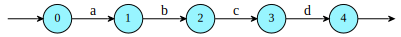

In [2]:
aut('ab') * aut('cd')

This multiplication is standard because the right hand side automaton is standard.

If you want to force the execution of the general algorithm you can do it this way.

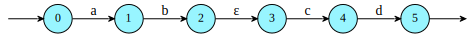

In [3]:
aut('ab').multiply(aut('cd'), "general")

In order to satisfy any kind of input automaton, the general algorithm inserts a transition labelled by `one`,
from each final transition of the left hand side automaton to each initial transition of the right hand side one.

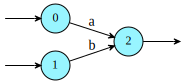

In [4]:
%%automaton -s a
$ -> 0
$ -> 1
1 -> 2 b
0 -> 2 a
2 -> $

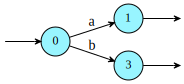

In [5]:
b = aut('b+a')
b

`a * b` is standard.

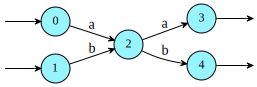

In [6]:
a * b

`b * a` is not.

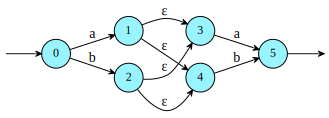

In [7]:
b * a

### Repeated Multiplication
Instead of `a.multiply(3)`, you may write `a ** 3`.  Beware that `a * 3` actually denotes `a.right_mult(3)`.

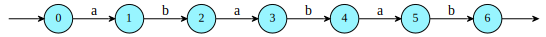

In [8]:
aut('ab') ** 3

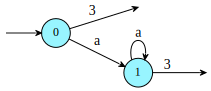

In [9]:
aut('a*') * 3

Use the exponent -1 to mean `infinity`.  Alternatively, you may invoke `a.star` instead of `a ** -1`.

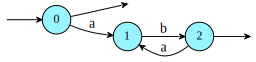

In [10]:
aut('ab') ** -1

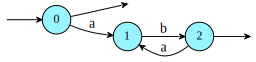

In [11]:
aut('ab').star()

### Sums of Repeated Multiplications
Instead of `a.multiply((2, 4))`, you may write `a ** (2, 4)`.  Again, use exponent -1 to mean infinity.

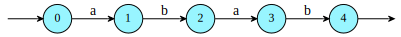

In [12]:
aut('ab') ** (2, 2)

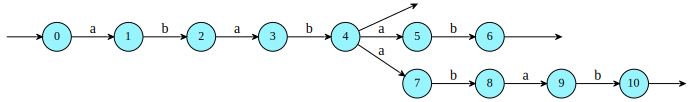

In [13]:
aut('ab') ** (2, 4)

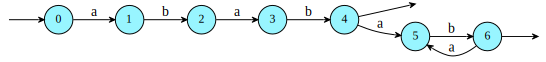

In [14]:
aut('ab') ** (2, -1)

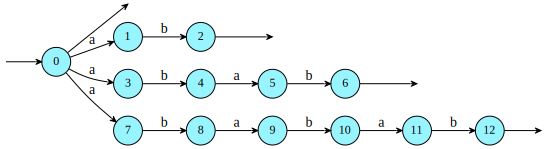

In [15]:
aut('ab') ** (-1, 3)

In some cases applying proper to the result automaton of the general algorithm will give you the result of the standard algorithm.

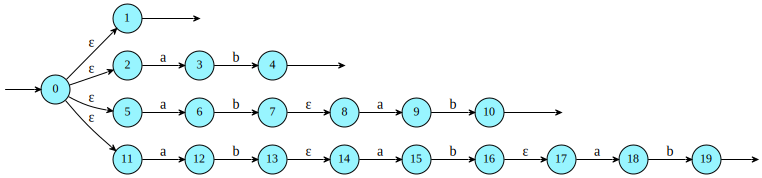

In [16]:
aut('ab').multiply((-1, 3), "general")

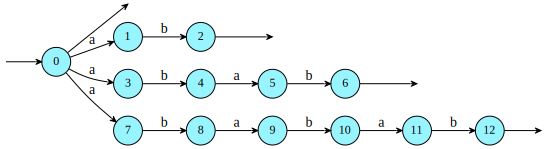

In [17]:
aut('ab').multiply((-1, 3), "general").proper()